In [1]:
import requests

import becquerel as bq

In [2]:
# Grab an example file from NIST. The list can be found here:
# https://www.nist.gov/pml/radiation-physics/iecn42-2011
response = requests.get("https://www.nist.gov/document/annexbn42xml")
n42_ex = response.text
print(n42_ex)
with open("example.n42", "w") as f:
    f.write(n42_ex)

<?xml version="1.0"?>
<?xml-model href="http://physics.nist.gov/N42/2011/N42/schematron/n42.sch" type="application/xml" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<RadInstrumentData xmlns="http://physics.nist.gov/N42/2011/N42" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://physics.nist.gov/N42/2011/N42 file:///d:/Data%20Files/ANSI%20N42%2042/V2/Schema/n42.xsd" n42DocUUID="d72b7fa7-4a20-43d4-b1b2-7e3b8c6620c1">

  <RadInstrumentInformation id="RadInstrumentInformation-1">
    <RadInstrumentManufacturerName>RIIDs R Us</RadInstrumentManufacturerName>
    <RadInstrumentModelName>iRIID</RadInstrumentModelName>
    <RadInstrumentClassCode>Radionuclide Identifier</RadInstrumentClassCode>
    <RadInstrumentVersion>
      <RadInstrumentComponentName>Software</RadInstrumentComponentName>
      <RadInstrumentComponentVersion>1.1</RadInstrumentComponentVersion>
    </RadInstrumentVersion>
  </RadInstrumentInformation>

  <RadDetectorInformation id="RadD

In [3]:
# Read in using becquerel N42 reader
n42 = bq.parsers.n42.N42File("example.n42")
print(n42)

{'EnergyCalibration-1': Calibration('p[0] + p[1] * x + p[2] * x**2', array([-2.18e+01,  1.21e+01,  6.55e-03]), domain=(0, 100000.0), rng=(0, 100000.0))}
{'RadMeasurement-1': N42RadMeasurement(startime='2003-11-22T23:45:19-07:00', realtime=60.0, livetime=59.61, counts=array([   0,    0,    0,   22,  421,  847, 1295, 1982, 2127, 2222, 2302,
       2276, 2234, 1921, 1939, 1715, 1586, 1469, 1296, 1178, 1127, 1047,
        928,  760,  679,  641,  542,  529,  443,  423,  397,  393,  322,
        272,  294,  227,  216,  224,  208,  191,  189,  163,  167,  173,
        150,  137,  136,  129,  150,  142,  160,  159,  140,  103,   90,
         82,   83,   85,   67,   76,   73,   84,   63,   74,   70,   69,
         76,   61,   49,   61,   63,   65,   58,   62,   48,   75,   56,
         61,   46,   56,   43,   37,   55,   47,   50,   40,   38,   54,
         43,   41,   45,   51,   32,   35,   29,   33,   40,   44,   33,
         35,   20,   26,   27,   17,   19,   20,   16,   19,   18,   19,
  

In [4]:
# Common top level header information
print(n42.rad_inst_info)
print(n42.rad_det_info)

[{'id': 'RadInstrumentInformation-1', 'RadInstrumentManufacturerName': {'value': 'RIIDs R Us'}, 'RadInstrumentModelName': {'value': 'iRIID'}, 'RadInstrumentClassCode': {'value': 'Radionuclide Identifier'}, 'RadInstrumentVersion': {'RadInstrumentComponentName': {'value': 'Software'}, 'RadInstrumentComponentVersion': {'value': '1.1'}}}]
[{'id': 'RadDetectorInformation-1', 'RadDetectorCategoryCode': {'value': 'Gamma'}, 'RadDetectorKindCode': {'value': 'NaI'}}]


In [5]:
# Calibrations are keyed by their ids in the file
print(n42.calibrations)
print(n42.calibrations["EnergyCalibration-1"])

{'EnergyCalibration-1': Calibration('p[0] + p[1] * x + p[2] * x**2', array([-2.18e+01,  1.21e+01,  6.55e-03]), domain=(0, 100000.0), rng=(0, 100000.0))}
expression:
    p[0] + p[1] * x + p[2] * x**2
params (p):
    [-2.18e+01  1.21e+01  6.55e-03]
domain:
    (0, 100000.0)
range:
    (0, 100000.0)



In [6]:
# Measurements can be accessed the same way
print(n42.measurements)
print(n42.measurements["RadMeasurement-1"])

{'RadMeasurement-1': N42RadMeasurement(startime='2003-11-22T23:45:19-07:00', realtime=60.0, livetime=59.61, counts=array([   0,    0,    0,   22,  421,  847, 1295, 1982, 2127, 2222, 2302,
       2276, 2234, 1921, 1939, 1715, 1586, 1469, 1296, 1178, 1127, 1047,
        928,  760,  679,  641,  542,  529,  443,  423,  397,  393,  322,
        272,  294,  227,  216,  224,  208,  191,  189,  163,  167,  173,
        150,  137,  136,  129,  150,  142,  160,  159,  140,  103,   90,
         82,   83,   85,   67,   76,   73,   84,   63,   74,   70,   69,
         76,   61,   49,   61,   63,   65,   58,   62,   48,   75,   56,
         61,   46,   56,   43,   37,   55,   47,   50,   40,   38,   54,
         43,   41,   45,   51,   32,   35,   29,   33,   40,   44,   33,
         35,   20,   26,   27,   17,   19,   20,   16,   19,   18,   19,
         18,   20,   17,   45,   55,   70,   62,   59,   32,   30,   21,
         23,   10,    9,    5,   13,   11,   11,    6,    7,    7,    9,
         

becquerel.Spectrum
    start_time:     None
    stop_time:      None
    realtime:       60.0
    livetime:       59.61
    is_calibrated:  False
    num_bins:       256
    gross_counts:   (4.248+/-0.021)e+04
    gross_cps:      712.6+/-3.5
    filename:       None


<AxesSubplot:xlabel='Channel', ylabel='Counts'>

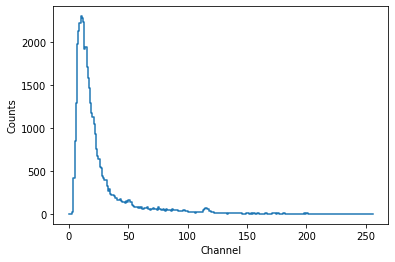

In [7]:
# Make a spectrum out of it
sp = bq.Spectrum(
    counts=n42.measurements["RadMeasurement-1"].counts,
    livetime=n42.measurements["RadMeasurement-1"].livetime,
    realtime=n42.measurements["RadMeasurement-1"].realtime,
)
print(sp)
sp.plot()

In [8]:
# Apply the calibration we read in
# I need to set the bin edges or something? Why...?
sp.apply_calibration(n42.calibrations["EnergyCalibration-1"])

ValueError: Bin edge energies must be strictly increasing

In [9]:
# Try a more challenging file, with multiple spectra and compressedZeroes compression
response = requests.get("https://www.nist.gov/document/annexen42xml")
n42_ex = response.text
print(n42_ex)
with open("example2.n42", "w") as f:
    f.write(n42_ex)

<?xml version="1.0"?>
<?xml-model href="http://physics.nist.gov/N42/2011/N42/schematron/n42.sch" type="application/xml" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<RadInstrumentData xmlns="http://physics.nist.gov/N42/2011/N42" 
                   xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" 
                   xsi:schemaLocation="http://physics.nist.gov/N42/2011/N42 http://physics.nist.gov/N42/2011/n42.xsd"
                   n42DocUUID="3efc2d27-ce4a-41e3-8745-deb5417841de">

  <RadInstrumentInformation id="NTSTT_CS01S">
    <RadInstrumentManufacturerName>SRPMs R Us</RadInstrumentManufacturerName>
    <RadInstrumentIdentifier>SRPM123</RadInstrumentIdentifier>
    <RadInstrumentModelName>iSRPM</RadInstrumentModelName>
    <RadInstrumentDescription>SRPM at test facility lane 1</RadInstrumentDescription>
    <RadInstrumentClassCode>Spectroscopic Portal Monitor</RadInstrumentClassCode>
    <RadInstrumentVersion>
      <RadInstrumentComponentName>Hardware</RadInstrument

In [10]:
n42 = bq.parsers.n42.N42File("example2.n42")
# We're not grabbing the multiple spectra per measurement, TODO
print()
print(n42.rad_inst_info)
print(n42.rad_det_info)

{'ENCAL': Calibration('p[0] + p[1] * x + p[2] * x**2', array([0.    , 0.3662, 0.    ]), domain=(0, 100000.0), rng=(0, 100000.0))}
{'Background-20100127150000': N42RadMeasurement(startime='2010-01-27T12:50:00.0Z', realtime=300.0, livetime=298.212262, counts=array([0, 0, 0, ..., 0, 0, 0]), calibration='ENCAL'), 'Foreground-20100127130218': N42RadMeasurement(startime='2010-01-27T13:02:18.4Z', realtime=1.0, livetime=0.997321, counts=array([0, 0, 0, ..., 0, 0, 0]), calibration='ENCAL'), 'Foreground-20100127130219': N42RadMeasurement(startime='2010-01-27T13:02:19.4Z', realtime=1.0, livetime=0.997321, counts=array([0, 0, 0, ..., 0, 0, 0]), calibration='ENCAL'), 'Foreground-20100127130220': N42RadMeasurement(startime='2010-01-27T13:02:20.4Z', realtime=1.0, livetime=0.997321, counts=array([0, 0, 0, ..., 0, 0, 0]), calibration='ENCAL'), 'Foreground-20100127130221': N42RadMeasurement(startime='2010-01-27T13:02:21.4Z', realtime=1.0, livetime=0.997321, counts=array([0, 0, 0, ..., 0, 0, 0]), calibra

In [11]:
# print(n42.measurements)
print(n42.measurements["Background-20100127150000"])

N42RadMeasurement(startime='2010-01-27T12:50:00.0Z', realtime=300.0, livetime=298.212262, counts=array([0, 0, 0, ..., 0, 0, 0]), calibration='ENCAL')
